# QBUS6830 Tutorial Lab 5: Factor modelling and forecasting

## Good Notes on Factor Analysis
https://math.unm.edu/~james/w14-STAT576c.pdf


## Data
We use the data from the text by Tsay in Chapter 9, being monthly returns on IBM, HPQ, Intel, JP Morgan and Bank of America, from January, 1990 to December, 2008.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
from statsmodels.multivariate.pca import PCA
from statsmodels.multivariate.factor import Factor
from statsmodels.multivariate.factor_rotation import rotate_factors
from scipy import stats

In [2]:
data = pd.read_csv('Tsay_FM_data.txt', sep=" ")
data

,IBM,HPQ,INTC,JPM,BAC
0,4.670132,-5.715888,13.534180,-14.858700,-9.639196
1,6.344511,-3.419090,1.880900,-0.486582,6.565384
2,2.142973,6.138104,3.658937,-6.322525,-13.835790
3,2.673053,-4.756132,-5.539855,0.000000,-1.954476
4,10.617640,9.034880,20.009520,15.796310,2.853595
...,...,...,...,...,...
223,-4.596960,4.623548,3.628757,-5.410778,-5.498008
224,-3.997340,-1.287047,-19.969930,19.334560,13.497570
225,-22.955530,-18.891730,-15.560170,-11.492280,-37.023650
226,-12.433830,-8.161144,-13.976220,-26.459730,-39.701940


In [3]:
# Sample covariance matrix 
data.cov()

,IBM,HPQ,INTC,JPM,BAC
IBM,74.637889,42.281185,48.026917,30.103004,21.069532
HPQ,42.281185,112.218893,70.451876,42.423721,26.299668
INTC,48.026917,70.451876,146.496870,44.594203,29.242793
JPM,30.103004,42.423721,44.594203,106.036892,67.452895
BAC,21.069532,26.299668,29.242793,67.452895,91.826100


In [4]:
'''
Biplot for a given weight matrix
'''
def biplot(weight, labels=None):
    ax = plt.axes()
    for i in range(weight.shape[0]):
        w = weight[i, :]
        if labels is None:
            ax.plot([0, w[0]], [0, w[1]])
        else:
            ax.plot([0, w[0]], [0, w[1]], label=labels[i])
        ax.scatter(w[0], w[1])
    ax.axhline(y=0, color='k', alpha=0.6)
    ax.axvline(x=0, color='k', alpha=0.6)
    lim = np.max(np.abs(weight[:, :2]))
    lim = lim + 0.1 * lim
    ax.axis([-lim, lim, -lim, lim])
    ax.grid(True)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    return ax

'''
3D biplot for a given weight matrix
'''
def biplot3d(weight):
    ax = plt.axes(projection="3d")
    for i in range(weight.shape[0]):
        w = weight[i, :]
        ax.plot([0, w[0]], [0, w[1]], [0, w[2]])
        ax.scatter(w[0], w[1], w[2])
    lim = np.max(np.abs(weight[:, :3]))
    lim = lim + 0.1 * lim
    ax.axis([-lim, lim, -lim, lim])
    ax.set_zbound(lower=-lim, upper=lim)
    ax.plot([-lim, lim], [0, 0], [0, 0], 'k', alpha=0.6)
    ax.plot([0, 0], [-lim, lim], [0, 0], 'k', alpha=0.6)
    ax.plot([0, 0], [0, 0], [-lim, lim], 'k', alpha=0.6)
    ax.grid(True)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    return ax

#### (a) Perform a Factor Analysis with m=1 factor on these return series.

In [5]:
# This method from 'statsmodels' fits the factors using the standardised data and correlation matrix. 
# This will not given exactly the same answer as the method in the Python code for the lecture on factor models.
# If you use this method, remember to re-scale your loadings and uniqueness parameter estimates, as below.
# It is OK for you to use either method, I am showing you both methods, since both are commonly used.

fm1 = Factor(endog=data, n_factor=1, method='ml')
result1 = fm1.fit()

In [7]:
fm1 = Factor(endog=data, n_factor=1, method='ml')
result1 = fm1.fit(opt_method='newton-cg')

/Users/jameschok/anaconda3/lib/python3.7/site-packages/statsmodels/multivariate/factor.py:414: OptimizeWarning: Unknown solver options: gtol
  options=opt)
/Users/jameschok/anaconda3/lib/python3.7/site-packages/statsmodels/multivariate/factor.py:416: UserWarning: Fitting did not converge
  warnings.warn("Fitting did not converge")


In [17]:
data.head()

,IBM,HPQ,INTC,JPM,BAC
0,4.670132,-5.715888,13.534180,-14.858700,-9.639196
1,6.344511,-3.419090,1.880900,-0.486582,6.565384
2,2.142973,6.138104,3.658937,-6.322525,-13.835790
3,2.673053,-4.756132,-5.539855,0.000000,-1.954476
4,10.617640,9.034880,20.009520,15.796310,2.853595


In [18]:
# Standardised factor loadings
result1.loadings

array([[0.47076342],
       [0.51961577],
       [0.49686593],
       [0.84261251],
       [0.72605999]])

In [19]:
# Factor loadings (regression coefficients), i.e. rescaled to be on the scale of y (i.e. the returns data).
result1.loadings[:, 0] * data.std()

IBM     4.067077
HPQ     5.504467
INTC    6.013861
JPM     8.676736
BAC     6.957538
dtype: float64

# Answer guide #
The factor loadings are all positive and reasonably similar in magnitude, suggesting the returns are similarly positively related to the underlying factor. This suggest the underlying factor behaves like a market factor, or represents the latent variable that drives the US market returns in general. 

In [20]:
# Specific error variances, for standardised data
result1.uniqueness

array([0.77838182, 0.7299995 , 0.75312429, 0.29000386, 0.47283656])

In [21]:
ser2 = result1.uniqueness * data.var()    # rescaled uniqueness for actual data
tbl_var = pd.DataFrame({'Sample Variance': data.var().round(4),
                        'Specific Variance' : ser2.round(4)})
tbl_var.T

,IBM,HPQ,INTC,JPM,BAC
Sample Variance,74.6379,112.2189,146.4969,106.0369,91.8261
Specific Variance,58.0968,81.9197,110.3304,30.7511,43.4187


# Answer guide #
The uniqueness is scaled to be the error or specific variance for each return series. Each is reduced quite a lot from the orginal sample variance for each series. 

In [23]:
# This was just wrong before - they were comparing variance with std

ser = np.sqrt(ser2)
r2 = np.sqrt(result1.communality * data.var())     # re-scaled to be for actual data

tbl_r = pd.DataFrame({'Sample STD': data.std().round(4),
                      'Communal STD': r2.round(4),
                      'Specific STD' : ser.round(4)})
tbl_r.T

,IBM,HPQ,INTC,JPM,BAC
Sample STD,8.6393,10.5933,12.1036,10.2974,9.5826
Communal STD,4.0671,5.5045,6.0139,8.6767,6.9575
Specific STD,7.6221,9.0510,10.5038,5.5454,6.5893


In [26]:
r2 = result1.communality * data.var()    # re-scaled to be for actual data
communal_var = result1.communality * data.var()

tbl_r = pd.DataFrame({'Sample Variance': data.var().round(4),
                      'Communal Variance': communal_var.round(4),
                      'Specific Variance' : ser.round(4)**2})
tbl_r.T

,IBM,HPQ,INTC,JPM,BAC
Sample Variance,74.637900,112.218900,146.496900,106.036900,91.826100
Communal Variance,16.541100,30.299200,36.166500,75.285800,48.407400
Specific Variance,58.096408,81.920601,110.329814,30.751461,43.418874


In [28]:
30.299200 + 81.920601

112.219801

In [27]:
# overall amount of variance captured 

# Why not just use np.sum(data.var()) instead of np.trace(data.cov())
(np.trace(data.cov()) - np.sum(ser2)) / np.trace(data.cov()) * 100

38.91066652982199

In [31]:
np.sum(ser2)

324.516707451006

In [29]:
# Cov(IBM, IBM) = Var(IBM)
data.cov()

,IBM,HPQ,INTC,JPM,BAC
IBM,74.637889,42.281185,48.026917,30.103004,21.069532
HPQ,42.281185,112.218893,70.451876,42.423721,26.299668
INTC,48.026917,70.451876,146.496870,44.594203,29.242793
JPM,30.103004,42.423721,44.594203,106.036892,67.452895
BAC,21.069532,26.299668,29.242793,67.452895,91.826100


In [68]:
total_data_variance = np.sum(data.var())
total_specific_variance = np.sum(ser2)

(total_data_variance - total_specific_variance) / total_data_variance

0.38910666529821997

In [70]:
total_communal_variance = np.sum(result1.communality * data.var())

total_communal_variance / total_data_variance

0.3891066652982202

In [32]:
result1.communality * data.var()

IBM     16.541113
HPQ     30.299158
INTC    36.166519
JPM     75.285784
BAC     48.407363
dtype: float64

# Answer guide #
The amount of return variance captured by the factor in the each series varies from 16\% IBM to 75\% for JPM. Clearly the 1 factor model is a modertaley strong fit for JPM and BAC only, is only mildly fitting for HPQ and INTC and is a fairly weak fit for IBM. Perahsp $m=2$ is needed here?

#### (b) Describe the factor loadings and factor found: do they make sense or have a relevant or useful interpretation?

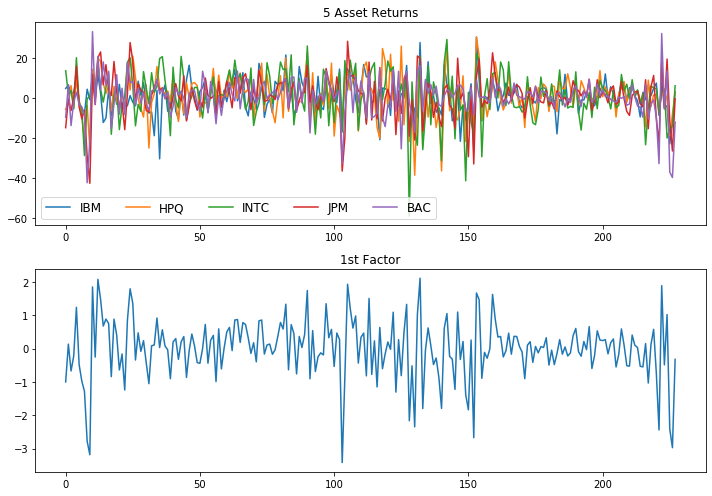

In [33]:
score = result1.factor_scoring(method='regression', transform=True)
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
data.plot(ax=ax[0])
ax[0].set_title('5 Asset Returns')
ax[0].legend(loc='best', ncol=5, fontsize=12)
ax[1].plot(score)
ax[1].set_title('1st Factor')
plt.tight_layout()
plt.show()

# Answer guide #
As above, the factor loadings are all positive and reasonably similar in magnitude, suggesting the returns are similarly positively related to the underlying factor. This suggest the underlying factor behaves like a market factor, or represents the latent variable that drives the US market returns in general. 

This ibterpretation is confirmed by the plot above showing that the estimated factor, in the bottom plot, captures most of the up and down movements that seem similar in each return  series in the top plot. i.e. when most series have larger negative returns, the factor is also negative; same in the positive return cases. The factor follows the general, shared movements of the 5 return series.

#### (c) Assess whether this 1 factor model is appropriate for this data.

In [34]:
# Correlation between factor 1 and the assets
corr_f = data.copy()
corr_f['Score'] = score
corr_f.corr()['Score'][:5]

IBM     0.519975
HPQ     0.573934
INTC    0.548806
JPM     0.930695
BAC     0.801959
Name: Score, dtype: float64

In [35]:
corr_f.head()

,IBM,HPQ,INTC,JPM,BAC,Score
0,4.670132,-5.715888,13.534180,-14.858700,-9.639196,-0.998138
1,6.344511,-3.419090,1.880900,-0.486582,6.565384,0.135798
2,2.142973,6.138104,3.658937,-6.322525,-13.835790,-0.670411
3,2.673053,-4.756132,-5.539855,0.000000,-1.954476,-0.221122
4,10.617640,9.034880,20.009520,15.796310,2.853595,1.240064


In [36]:
tbl_corr = pd.DataFrame({'Correlation' : corr_f.corr()['Score'][:5].round(4),
                         'Loading': (result1.loadings[:, 0] * data.std()).round(4),
                         'r2': r2.round(4)})
tbl_corr.T

,IBM,HPQ,INTC,JPM,BAC
Correlation,0.5200,0.5739,0.5488,0.9307,0.8020
Loading,4.0671,5.5045,6.0139,8.6767,6.9575
r2,16.5411,30.2992,36.1665,75.2858,48.4074


There is a statistical test comparing the sample covariance matrix to the var- cov matrix estimated using the loadings and specific variances, under the ML estimation method.

The test statistic is:
$$LR(m) = -[T - 1 - \frac{2n + 5}{6} - \frac{2m}{3}]\left(\ln\lvert \hat{\Sigma} \rvert - \ln \lvert\hat{\beta}\hat{\beta}'+\hat{\Psi}\rvert\right) $$
which, under a null hypothesis that the number of factors equals m, follows a chi-squared distribution with $0.5[(n − m)^2 − n − m]$ degrees of freedom.

In [37]:
# standardise data and show correlation matrix
x = (data - data.mean()) / data.std()
x.cov()

,IBM,HPQ,INTC,JPM,BAC
IBM,1.000000,0.461992,0.459294,0.338378,0.254503
HPQ,0.461992,1.000000,0.549472,0.388908,0.259080
INTC,0.459294,0.549472,1.000000,0.357796,0.252128
JPM,0.338378,0.388908,0.357796,1.000000,0.683579
BAC,0.254503,0.259080,0.252128,0.683579,1.000000


In [38]:
# show fitted correlation matrix using factor loadings and uniquenesss for statndardised data
result1.fitted_cov

array([[1.00000002, 0.2446161 , 0.2339063 , 0.39667115, 0.34180249],
       [0.2446161 , 1.00000004, 0.25817937, 0.43783475, 0.37727222],
       [0.2339063 , 0.25817937, 1.00000004, 0.41866544, 0.36075447],
       [0.39667115, 0.43783475, 0.41866544, 0.99999969, 0.61178723],
       [0.34180249, 0.37727222, 0.36075447, 0.61178723, 0.99999967]])

In [43]:
Λ = result1.loadings
Ψ = np.diag(result1.uniqueness)

Λ @ Λ.T + Ψ

array([[1.00000002, 0.2446161 , 0.2339063 , 0.39667115, 0.34180249],
       [0.2446161 , 1.00000004, 0.25817937, 0.43783475, 0.37727222],
       [0.2339063 , 0.25817937, 1.00000004, 0.41866544, 0.36075447],
       [0.39667115, 0.43783475, 0.41866544, 0.99999969, 0.61178723],
       [0.34180249, 0.37727222, 0.36075447, 0.61178723, 0.99999967]])

# Answer guide #
The factors $f$ and uniqueness variances $\psi^2$ combine to estimate the covariance matrix of the 5 series. In tnhis case, we used the standardised series, so the factor estimates the correlation matrix of the 5 return series. This matrix is shown above. Directly above, the correlation matrix as estimated by the factor model i.e. $f f' + \Psi$, is also shown. The differences in sample and estimated correlations seem large to me, with the top left sample correlations under-estimated by the model and bottom left (and thus top right) over-estimated by the model. 

We can do a test to see if these differences are statistically significant.

$$LR(m) = -[T - 1 - \frac{2n + 5}{6} - \frac{2m}{3}]\left(\ln\lvert \hat{\Sigma} \rvert - \ln \lvert\hat{\beta}\hat{\beta}'+\hat{\Psi}\rvert\right) $$

In [44]:
ll = np.log(np.linalg.det(x.cov())) - np.log(np.linalg.det(result1.fitted_cov))

In [49]:
m = 1  # Number of Factors
T = data.shape[0]  # Length of the dataset
n = data.shape[1]  # Number of variables
lr = -(T - 1 - (2 * n + 5) / 6 - 2 * m / 3) * ll
lr

92.01539681724958

In [50]:
df = 0.5 * ((n - m) **2 - n - m) 
df

5.0

# Answer guide #
The null hypothesis is that the $m=1$ factor model is able to model the 5 return series. The test statistic above is $92.02$, which if the model is correct follows a $\chi^2_5$ distribution. The p-value is the chance of observing a $\chi^2_5$ variable at least as high as 92.02. The p-value is calculated below as $\approx 0$. Thus we reject the null and conclude the the $m=1$ factor model is not appropriate for this data; it is not able to estimate the correlation matrix of the return series sufficiently accurately.

In [51]:
stats.chi2.sf(lr, df)

2.5339668484830007e-18

In [52]:
# Factor model (m=1) using method based on unscaled data, covariance matrix, for comparison
from sklearn.decomposition import FactorAnalysis
fmo = FactorAnalysis(n_components=1, svd_method='lapack')
fo = fmo.fit_transform(data)
print(fmo.mean_)   # estimates of intercept terms
print(fmo.noise_variance_)  # estimates of specific variances
print('')
print(fmo.components_.T *(-1))   # estimates factor loadings

[0.70043176 0.98597967 1.19573159 0.82360596 0.41045949]
[48.54924438 63.19108071 86.27082986 54.39663273 59.86948834]

[[5.06540636]
 [6.94927632]
 [7.69888239]
 [7.17578609]
 [5.63914777]]


# Answer guide #
Note the method directly above, applied directly to the covariance matrix, as used in the lecture, gives slightly different answers. However the interpretation of the factor based on the loadings is very similar: still seems like a market factor, loading, with all 5 returns series loading similarly and positively on it.

#### (d) Perform a Factor Analysis with m=2 factors on these return series. Describe the factor loadings and factors found: do they make sense or have a relevant or useful interpretation? Assess whether this 2 factor model is appropriate for this data. How many factors should we choose to use?

In [53]:
fm2 = Factor(endog=data, n_factor=2, method='ml')
result2 = fm2.fit()

In [54]:
result2.loadings

array([[-0.32649945,  0.52994729],
       [-0.34817067,  0.66854919],
       [-0.3365823 ,  0.64661446],
       [-0.73378001,  0.18650687],
       [-0.95982867, -0.11111494]])

In [55]:
# Actual loadings
tbl_loading2 = pd.DataFrame({'Factor 1': round(result2.loadings[:,0] * data.std(), 4),
                             'Factor 2': round(result2.loadings[:,1] * data.std(), 4)})
tbl_loading2

,Factor 1,Factor 2
IBM,-2.8207,4.5784
HPQ,-3.6883,7.0822
INTC,-4.0739,7.8264
JPM,-7.5560,1.9205
BAC,-9.1976,-1.0648


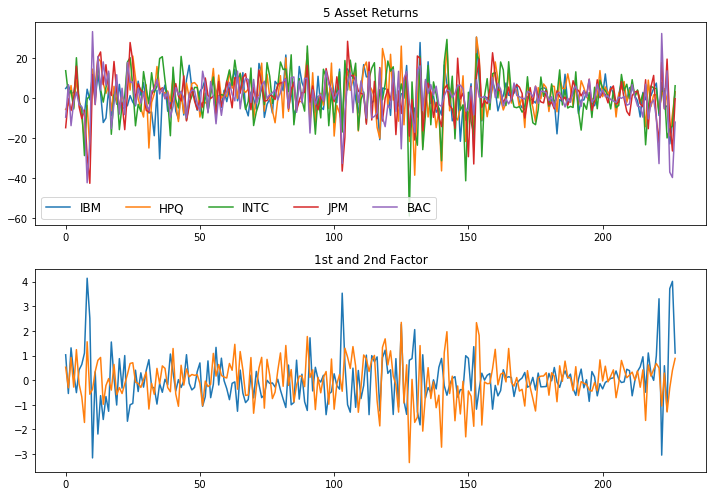

In [43]:
score = result2.factor_scoring(method='regression', transform=True)

fig, ax = plt.subplots(2, 1, figsize=(10, 7))
data.plot(ax=ax[0])
ax[0].set_title('5 Asset Returns')
ax[0].legend(loc='best', ncol=5, fontsize=12)
ax[1].plot(score[:,0])
ax[1].plot(score[:,1])
ax[1].set_title('1st and 2nd Factor')
plt.tight_layout()
plt.show()

# Answer guide #
The first factor loads negatively on each factor. The plot above shows it is negatively related to the movements in the 5 return series. In a financial return setting this is non-intuitive and not desirable. However, just as in PCA, the sign of the factor loadings vector is not unique, only the sign of the multiplication $\beta f$ is. Thus, we may choose to make the 1st factor loading all positive, by multiplying it by (-1), while also multiplying the 1st factor by (-1), since $\beta f = -\beta (-f) = (-1)^2 \beta f = \beta f$. This does not change the maths at all, it just gives a more intuitive and suitable interpretation of the factor in this financial context.    

In [56]:
# Actual loadings, 1st factor by (-1)
tbl_loading2 = pd.DataFrame({'Factor 1': round(result2.loadings[:,0] * data.std() * (-1), 4),
                             'Factor 2': round(result2.loadings[:,1] * data.std(), 4)})
tbl_loading2

,Factor 1,Factor 2
IBM,2.8207,4.5784
HPQ,3.6883,7.0822
INTC,4.0739,7.8264
JPM,7.5560,1.9205
BAC,9.1976,-1.0648


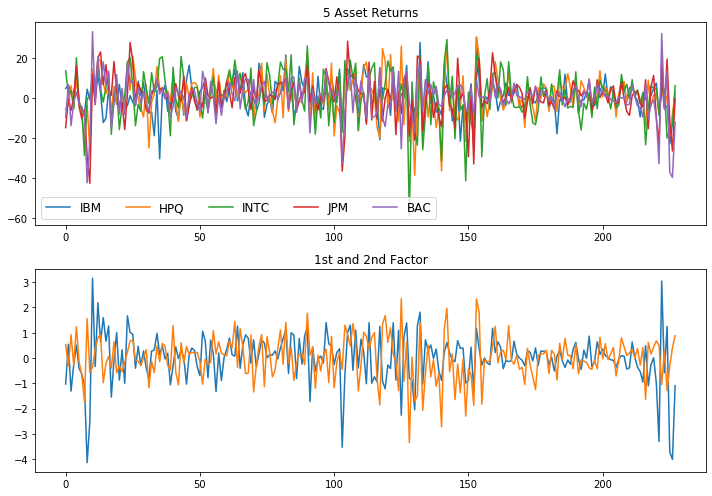

In [45]:
score = result2.factor_scoring(method='regression', transform=True)

fig, ax = plt.subplots(2, 1, figsize=(10, 7))
data.plot(ax=ax[0])
ax[0].set_title('5 Asset Returns')
ax[0].legend(loc='best', ncol=5, fontsize=12)
ax[1].plot(score[:,0] * (-1))      # 1st factor times (-1)
ax[1].plot(score[:,1])
ax[1].set_title('1st and 2nd Factor')
plt.tight_layout()
plt.show()

# Answer guide #
The first factor now loads positively on each return series and again seems to capture most of the general up and down movements in the 5 return series. However, there are large differences in the magnitude of the loading for each series, e.g. BAC loads much more highly than IBM on the first factor. Thus, this is not as easily interpreted as a "market factor". Here, the loadings seem higher for the banking stocks, BAC and JPM, than for those on the tech stocks. So, this may be a factor that drives the market positively, but drives banking stock returns moreso than it does tech-related assets. 

The 2nd factor loads positively and highly on INTC, HPQ and IBM too; and negatively on BAC. The plot above shows this factor captures movements in the returns when those movements are dominated by tech stocks IBM, INTC and HPQ. This factor seems to positively drive tech-related asset returns, with much lower loadings for banking stocks. It is a more tech-specific factor. 

Thus our interpretation can be that the 1st factor loads positively for all 5 series, but seems to drive banking stocks somewhat moreso than tech stocks; while factor 2 seems to drive tech-related assets.

In [57]:
# Specific error variances
print(result2.uniqueness)
ser2_2 = result2.uniqueness * data.var()    # re-scaled for returns
ser2_2

[0.61255404 0.43181919 0.46860201 0.42678182 0.0663823 ]


IBM     45.719741
HPQ     48.458271
INTC    68.648727
JPM     45.254618
BAC      6.095628
dtype: float64

In [58]:
tbl_var2 = pd.DataFrame({'Specific Variance for 1 Factor': ser2.round(4),
                         'Specific Variance for 2 Factor': ser2_2.round(4)})
tbl_var2.T

,IBM,HPQ,INTC,JPM,BAC
Specific Variance for 1 Factor,58.0968,81.9197,110.3304,30.7511,43.4187
Specific Variance for 2 Factor,45.7197,48.4583,68.6487,45.2546,6.0956


In [59]:
ser_2 = np.sqrt(ser2_2)
r2_2 = result2.communality * data.var()

tbl_r_2 = pd.DataFrame({'Sample STD': data.std().round(4),
                        'Specific STD (m=1)' : ser.round(4),
                        'Specific STD (m=2)' : ser_2.round(4),
                        'Communar Var (m=1)': r2.round(4),
                        'Communar Var (m=2)': r2_2.round(4)})
tbl_r_2.T

,IBM,HPQ,INTC,JPM,BAC
Sample STD,8.6393,10.5933,12.1036,10.2974,9.5826
Specific STD (m=1),7.6221,9.0510,10.5038,5.5454,6.5893
Specific STD (m=2),6.7616,6.9612,8.2855,6.7272,2.4689
Communar Var (m=1),16.5411,30.2992,36.1665,75.2858,48.4074
Communar Var (m=2),28.9181,63.7606,77.8481,60.7823,85.7305


In [60]:
r2_2 = result2.communality * data.var()

tbl_r_2 = pd.DataFrame({'Sample Var': data.var().round(4),
                        'Specific Var (m=1)' : ser2.round(4),
                        'Specific Var (m=2)' : ser2_2.round(4),
                        'Communal Var (m=1)': r2.round(4),
                        'Communal Var (m=2)': r2_2.round(4)})
tbl_r_2.T

,IBM,HPQ,INTC,JPM,BAC
Sample Var,74.6379,112.2189,146.4969,106.0369,91.8261
Specific Var (m=1),58.0968,81.9197,110.3304,30.7511,43.4187
Specific Var (m=2),45.7197,48.4583,68.6487,45.2546,6.0956
Communal Var (m=1),16.5411,30.2992,36.1665,75.2858,48.4074
Communal Var (m=2),28.9181,63.7606,77.8481,60.7823,85.7305


In [60]:
# overall amount of variance captured 
(np.trace(data.cov()) - np.sum(ser2_2)) / np.trace(data.cov()) *100

59.68180075321887

In [61]:
total_data_variance = np.sum(data.var())
specific_variance = np.sum(ser2_2)

(total_data_variance - specific_variance) / total_data_variance

0.5968180075321888

# Answer guide #
The factor model with $m=2$ seems to fit much more accurately than the 1 factor model. The uniqueness (and hence SER) is lower in each case and the $R^2$-adjusted is much higher in each case (except for JPM). Overall, the model $R^2$ has increased from 39\% for $m=1$ to 60\% for $m=2$. The 2 factor model is a much stronger fit than the 1 factor model.

In [64]:
x.cov()

,IBM,HPQ,INTC,JPM,BAC
IBM,1.000000,0.461992,0.459294,0.338378,0.254503
HPQ,0.461992,1.000000,0.549472,0.388908,0.259080
INTC,0.459294,0.549472,1.000000,0.357796,0.252128
JPM,0.338378,0.388908,0.357796,1.000000,0.683579
BAC,0.254503,0.259080,0.252128,0.683579,1.000000


In [67]:
result2.fitted_cov

array([[1.00000006, 0.46797336, 0.45256552, 0.33841758, 0.25449847],
       [0.46797336, 1.00000002, 0.54948166, 0.38016969, 0.25989838],
       [0.45256552, 0.54948166, 0.99999991, 0.3675754 , 0.25121281],
       [0.33841758, 0.38016969, 0.3675754 , 0.99999974, 0.68357939],
       [0.25449847, 0.25989838, 0.25121281, 0.68357939, 0.9999999 ]])

In [68]:
# Chi-squared test
ll_2 = np.log(np.linalg.det(x.cov())) - np.log(np.linalg.det(result2.fitted_cov))
m = 2
lr_2 = -(T - 1 - (2 * n + 5) / 6 - 2 * m / 3) * ll_2
lr_2

0.27587765450850404

In [69]:
df = 0.5 * ((n - m) **2 - n - m )
df

1.0

In [70]:
stats.chi2.sf(lr_2, df)

0.5994159665219878

# Answer guide #
The 2 factor model cannot be rejected as appropriate for the data, since the p-value is so high (e.g. higher than 0.05).

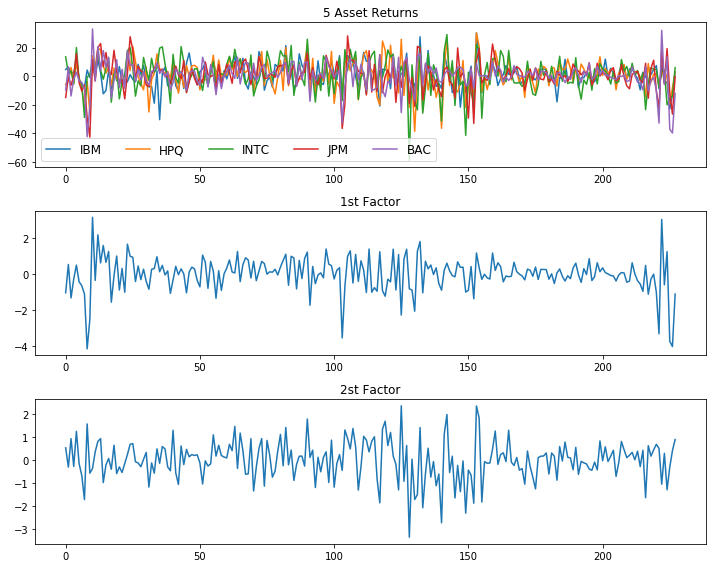

In [71]:
score_2 = result2.factor_scoring(method='regression', transform=True)
fig, ax = plt.subplots(3, 1, figsize=(10, 8))
data.plot(ax=ax[0])
ax[0].set_title('5 Asset Returns')
ax[0].legend(loc='best', ncol=5, fontsize=12)
ax[1].plot(score_2[:,0] * (-1))
ax[1].set_title('1st Factor')
ax[2].plot(score_2[:,1])
ax[2].set_title('2st Factor')
plt.tight_layout()
plt.show()

In [38]:
corr_f2 = data.copy()
corr_f2['Factor 1'] = score_2[:,0] *(-1)
corr_f2['Factor 2'] = score_2[:,1]
corr_f2.corr().iloc[:, 5:7].round(4)

,Factor 1,Factor 2
IBM,0.3367,0.6218
HPQ,0.3590,0.7845
INTC,0.3470,0.7587
JPM,0.7566,0.2188
BAC,0.9897,-0.1304
Factor 1,1.0000,-0.0000
Factor 2,-0.0000,1.0000


In [39]:
data.head()

,IBM,HPQ,INTC,JPM,BAC
0,4.670132,-5.715888,13.534180,-14.858700,-9.639196
1,6.344511,-3.419090,1.880900,-0.486582,6.565384
2,2.142973,6.138104,3.658937,-6.322525,-13.835790
3,2.673053,-4.756132,-5.539855,0.000000,-1.954476
4,10.617640,9.034880,20.009520,15.796310,2.853595


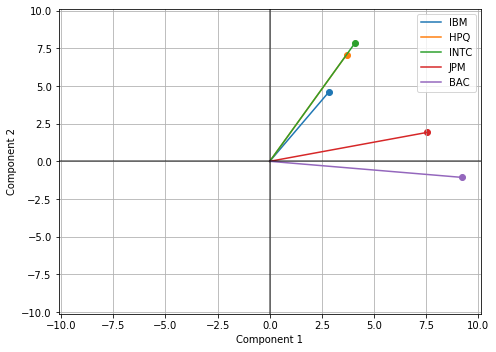

In [72]:
plt.figure(figsize=(7, 5))
biplot(tbl_loading2.values, labels=data.columns)
plt.tight_layout()
plt.legend()
plt.show()

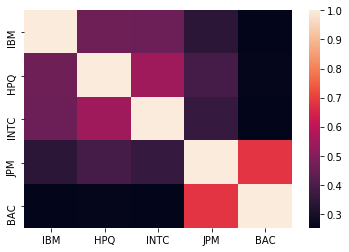

In [41]:
import seaborn as sns
sns.heatmap(data.corr());

#### (e) How about the varimax rotated factors (m=2)? Do these have a better interpretation?

In [42]:
result2.rotate(method='varimax')
result2.loadings

array([[-0.20342211,  0.58827329],
       [-0.19442921,  0.72827063],
       [-0.18788896,  0.70434057],
       [-0.67564976,  0.34163625],
       [-0.9610186 ,  0.10030378]])

In [43]:
tbl_loading2_ro = pd.DataFrame({'Factor 1': round(result2.loadings[:,0] * data.std() *(-1), 4),
                                'Factor 2': round(result2.loadings[:,1] * data.std(), 4)})
tbl_loading2_ro.T

,IBM,HPQ,INTC,JPM,BAC
Factor 1,1.7574,2.0597,2.2741,6.9575,9.2091
Factor 2,5.0823,7.7148,8.5250,3.5180,0.9612


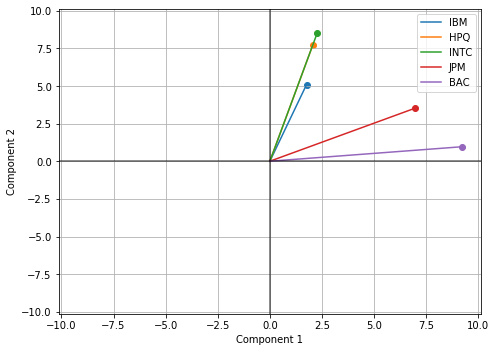

In [44]:
plt.figure(figsize=(7, 5))
biplot(tbl_loading2_ro.values, labels=data.columns)
plt.tight_layout()
plt.legend()
plt.show()

# Answer guide #
The rotated loadings seem very similar to the previous 2 factor loadings (after I multiplied the 1st factor by -1). The Varimax rotation seems to have achioeved almost exactly what we achieved simply my multiplying the 1st factor loadings by -1. This may give you some hint or intuition as to what rotation is and does.   

#### (f) Compare the PCA, 1 and 2 factor models in terms of model fit, adequacy and usefulness.

# Answer guide #
Clearly the 2 factor model fits the data much better than the 1 factor model: it has better strength of fit measures and doesn't get rejected by the likelihood ratio test of model fit. Also, the factors have a nice interpretation, the 1st mainly drives the banking stocks, the 2nd mainly drives the tech-related stocks.

Regarding PCA the 1st 2 components capture 75\% of the variance in the 5 return series which is more than the 2 factor model. These PCs also have a nice interpretation: the 1st PC is a market factor while the 2nd factor contrasts banking and tech-related stocks. However, we don't know if the PCA "model" fits the data well or not, while we know the 2 factor model does fit the data sufficiently well. 


# Forecasting
We again use the data from the text by Tsay in Chapter 9, being monthly returns on IBM, HPQ, Intel, JP Morgan and Bank of America, from January, 1990 to December, 2008.

#### g) For the IBM asset return series, use the following methods to provide horizon 1 forecasts for the last 24 months of returns in the sample:
1. Long-run mean for that asset
2. Mean of last 3 months for that asset
3. Mean of last 12 months for that asset
4. Mean of last 2 years for that asset
5. Naive

In [68]:
r = data
n_all = len(r)
n_fore = 24
n_wind = n_all - n_fore
f_ibm = np.empty((n_fore, 5))
i_col = 0  # IBM

for i in range(n_fore):
    r_wind = r.iloc[i:(i + n_wind), :]
    f_ibm[i, 0] = r_wind.iloc[:, i_col].mean()
    f_ibm[i, 1] = r_wind.iloc[-3:, i_col].mean()
    f_ibm[i, 2] = r_wind.iloc[-12:, i_col].mean()
    f_ibm[i, 3] = r_wind.iloc[-24:, i_col].mean()
    f_ibm[i, 4] = r_wind.iloc[-1:, i_col]

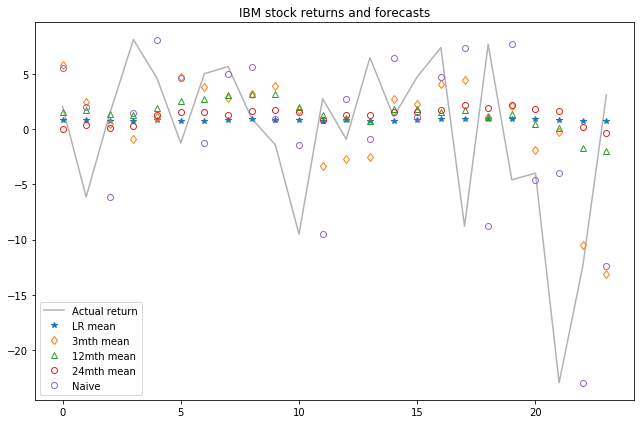

In [70]:
plt.figure(figsize=(9, 6))
plt.plot(r[-n_fore:].iloc[:, i_col].values, 'k', alpha=0.3, label='Actual return')
plt.plot(f_ibm[:, 0], '*', label='LR mean')
plt.plot(f_ibm[:, 1], 'd', mfc='none', label='3mth mean')
plt.plot(f_ibm[:, 2], '^', mfc='none', label='12mth mean')
plt.plot(f_ibm[:, 3], 'o', mfc='none', label='24mth mean')
plt.plot(f_ibm[:, 4], 'o', mfc='none', label='Naive')
plt.title('IBM stock returns and forecasts')
plt.legend()
plt.tight_layout()
plt.show()

In [67]:
r = data

forecast_length = 24
window_length = len(r) - forecast_length

f_ibm = np.empty((n_fore, 5))
i_col = 0  # IBM

for i in range(forecast_length):
    windowed_returns = r.iloc[i:(i + window_length), :]
    
    # Long Range Returns - Average the entire window
    f_ibm[i, 0] = windowed_returns.iloc[:, i_col].mean()
    
    # Moving 3 average - Average the last 3 points in the window
    f_ibm[i, 1] = windowed_returns.iloc[-3:, i_col].mean()
    
    # Moving 12 average - Average the last 12 points in the window
    f_ibm[i, 2] = windowed_returns.iloc[-12:, i_col].mean()
    
    # Moving 24 average - Average the last 24 points in the window
    f_ibm[i, 3] = windowed_returns.iloc[-24:, i_col].mean()
    
    # Naive Prediction - Use the last point in the window as the prediction
    f_ibm[i, 4] = windowed_returns.iloc[-1:, i_col]

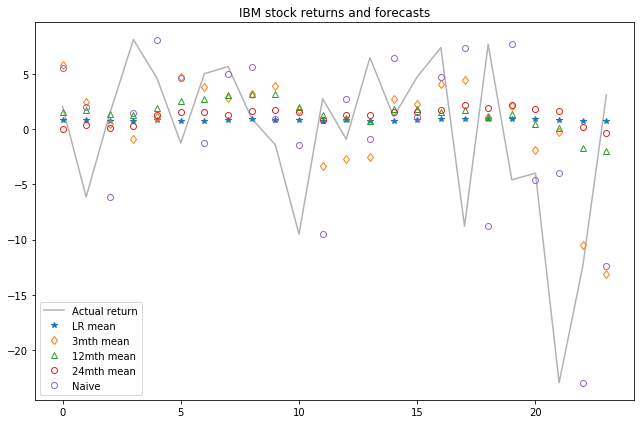

In [69]:
plt.figure(figsize=(9, 6))
plt.plot(r[-n_fore:].iloc[:, i_col].values, 'k', alpha=0.3, label='Actual return')
plt.plot(f_ibm[:, 0], '*', label='LR mean')
plt.plot(f_ibm[:, 1], 'd', mfc='none', label='3mth mean')
plt.plot(f_ibm[:, 2], '^', mfc='none', label='12mth mean')
plt.plot(f_ibm[:, 3], 'o', mfc='none', label='24mth mean')
plt.plot(f_ibm[:, 4], 'o', mfc='none', label='Naive')
plt.title('IBM stock returns and forecasts')
plt.legend()
plt.tight_layout()
plt.show()

### h) Assess the forecast accuracy of the methods employed.

In [47]:
def loss_func(y_obs, y_hat):
    rmse = np.sqrt(np.mean((y_hat - y_obs) ** 2))
    mad = np.mean(np.abs(y_hat - y_obs))
    return (rmse, mad)

In [48]:
# IBM
i_col = 0
r_fore = r.iloc[-n_fore:, i_col]
l = np.empty((2, 5))
for i in range(5):
    l[0, i], l[1, i] = loss_func(r_fore, f_ibm[:, i])
c_name = ['Mean', '3 Mth', '12 Mth', '24 Mth', 'Naive']
tbl_ibm = pd.DataFrame(l.round(4), columns=c_name, index=['RMSE', 'MAD'])
tbl_ibm

,Mean,3 Mth,12 Mth,24 Mth,Naive
RMSE,7.4037,8.0989,7.2561,7.5729,9.1781
MAD,5.4269,6.1751,5.4123,5.6249,7.6163


#### i) Discuss your findings

# Answer guide # 
None of the forecast methods seem to produce forecasts that follow the movements in the forecasted returns. According to the forecast accuracy measures, the long run mean and 12 month mean are the most accurate forecast methods. The naive method is the least accurate.  